In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Data.csv")

In [3]:
df.head()

,DEPTH,GR,Rt,RHOB,NPHI
0,2106.000,55.315,41.993,2729.732,19.442
1,2106.125,46.849,47.918,2684.776,20.444
2,2106.250,39.440,55.298,2546.362,21.201
3,2106.375,33.743,64.674,2401.586,19.590
4,2106.500,29.155,75.555,2340.779,15.539


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 5 columns):
DEPTH    233 non-null float64
GR       233 non-null float64
Rt       233 non-null float64
RHOB     233 non-null float64
NPHI     233 non-null float64
dtypes: float64(5)
memory usage: 9.2 KB


In [5]:
df.head()

,DEPTH,GR,Rt,RHOB,NPHI
0,2106.000,55.315,41.993,2729.732,19.442
1,2106.125,46.849,47.918,2684.776,20.444
2,2106.250,39.440,55.298,2546.362,21.201
3,2106.375,33.743,64.674,2401.586,19.590
4,2106.500,29.155,75.555,2340.779,15.539


In [6]:
df['NPHI']= df['NPHI']/100

In [7]:
def make_logs_plt(logs):
    #sort logs by depth
    logs = logs.sort_values(by='DEPTH')
    stop=logs.DEPTH.min()
    xbot=logs.DEPTH.max()
    
    fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(20,10))
    ax[0].plot(logs.GR, logs.DEPTH, '-', color='darkgreen')
    ax[1].plot(logs.Rt, logs.DEPTH, '-', color='blue')
    ax22= ax[2].twiny()
    ax22.plot(logs.RHOB, logs.DEPTH, '-', color='red')
    ax23= ax[2].twiny()
    ax23.plot(logs.NPHI, logs.DEPTH, '-', color='darkgreen')
    
    for i in range(len(ax)):
        ax[i].set_ylim(stop,xbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        
    #set x-axis
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(0,150)
    ax[1].set_xlabel("Rt Ohm.m")
    ax[1].set_xscale('log')
    ax[1].set_xlim(1,1000)
    ax22.spines['top'].set_position(('outward',10))
    ax22.set_xlabel("RHOB Kg/m3")
    ax22.set_xlim(1900,2900)
    ax23.invert_xaxis()
    ax23.spines['top'].set_position(('outward',50))
    ax23.set_xlabel("NPHI %")
    ax23.set_xlim(0.45,-0.15)
    
    #set y-axis
    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])

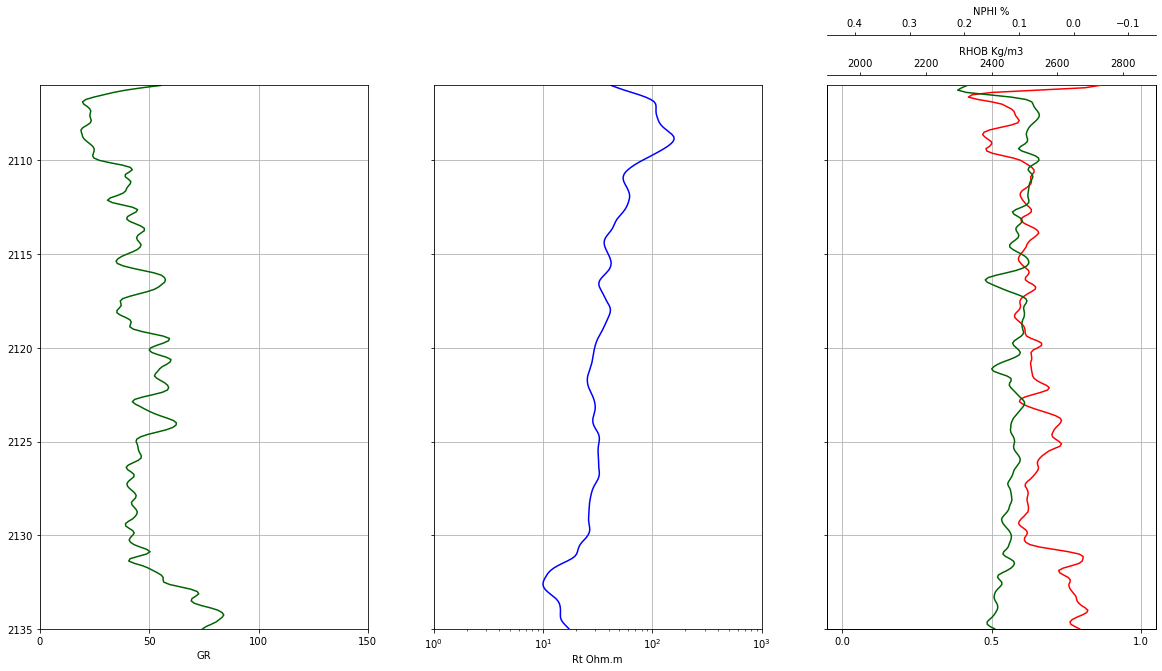

In [8]:
make_logs_plt(df)

### 1) Porosity from density log (negative values become zero)

In [9]:
def Porosity_Density(den,den_grain,den_fluid):
    Porosity_Density = (den_grain - den)/(den_grain - den_fluid)
    return Porosity_Density

In [10]:
den_grain, den_fluid = 2710,1000

In [11]:
df['Porosity_Density'] = Porosity_Density(df.RHOB, den_grain, den_fluid)
df['Porosity_Density'][df['Porosity_Density'] < 0] = 0
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919


### 2) Vshale (in practice, negatives become zero)

In [12]:
GR_min = 22
GR_max = 105

In [13]:
df['Vshale'] = ((df.GR - GR_min) / (GR_max - GR_min))
df['Vshale'][df['Vshale'] < 0] = 0
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205


### 3) Gaymard porosity for gas (negative porosities from any tool becomes zero)

In [14]:
def Porosity_Gaymard(Poro_RHOB,NPHI):
    Porosity_Gaymard= ((Poro_RHOB**2 + NPHI**2)/2)**(1/2)
    return Porosity_Gaymard

In [15]:
df['Porosity_Gaymard'] = Porosity_Gaymard(df.Porosity_Density, df.NPHI)
df['Porosity_Gaymard'][df['Porosity_Gaymard'] < 0] = 0
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105


### 4) Effective porosity approx equal to Gaymard porosity*(1-Vshale)

In [16]:
df['Effective_Porosity'] = df['Porosity_Gaymard'] * (1- df['Vshale'])
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889


### 5) Formation factor F

In [17]:
def Formation_Factor(a,Porosity,m):
    Formation_Factor= a*(Porosity)**(-m)
    return Formation_Factor

In [18]:
a, m = 1, 1.9

In [19]:
df['Formation_Factor'] = Formation_Factor(a,df.Effective_Porosity,m)
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295,115.024679
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545,77.152631
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917,48.309421
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650,31.893673
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889,28.380938


### Rt/Ashale ( values of a bigger that 1.0 become 1.0)

In [20]:
def Ashale(Rsh,Rt,Vlam):
    Ashale = ((Rsh - Rt*Vlam)*(1-Vlam))/Rsh
    Ashale[Ashale>1] = 1
    return Ashale

In [21]:
Rsh = 20

In [22]:
Ashale(Rsh, df.Rt, df.Vshale)

0      0.094121
1      0.198065
2      0.330989
3      0.465737
4      0.616208
5      0.830524
6      1.000000
7      1.000000
8      1.000000
9      1.000000
10     0.931801
11     0.898212
12     0.918126
13     0.928372
14     0.904237
15     0.874590
16     0.912028
17     1.000000
18     1.000000
19     1.000000
20     1.000000
21     1.000000
22     1.000000
23     1.000000
24     1.000000
25     0.898374
26     0.791004
27     0.751892
28     0.770089
29     0.811703
         ...   
203    0.629648
204    0.599941
205    0.554709
206    0.527562
207    0.507431
208    0.484736
209    0.465322
210    0.457810
211    0.461905
212    0.459789
213    0.426122
214    0.365991
215    0.306162
216    0.267048
217    0.251352
218    0.256395
219    0.266388
220    0.263184
221    0.243608
222    0.207492
223    0.166064
224    0.136628
225    0.121457
226    0.115863
227    0.121304
228    0.130415
229    0.137221
230    0.149385
231    0.162065
232    0.167266
Length: 233, dtype: floa

In [23]:
df['Rt_Ashale']= df.Rt / Ashale(Rsh,df.Rt,df.Vshale)
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295,115.024679,446.161352
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545,77.152631,241.930393
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917,48.309421,167.068775
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650,31.893673,138.863668
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889,28.380938,122.612738


### 7) Ro

In [24]:
def Ro(F, Rw):
    Ro = F * Rw
    return Ro

In [25]:
Rw = 1.00

In [26]:
df['Ro'] = Ro(df.Formation_Factor, Rw)
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295,115.024679,446.161352,115.024679
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545,77.152631,241.930393,77.152631
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917,48.309421,167.068775,48.309421
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650,31.893673,138.863668,31.893673
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889,28.380938,122.612738,28.380938


### 8) I Shale (resistivity index of shale)

In [27]:
def Ish(Rt_Ashale,Ro):
    Ish = Rt_Ashale/Ro
    return Ish

In [28]:
df['Ish']= Ish(df.Rt_Ashale, df.Ro)
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro,Ish
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295,115.024679,446.161352,115.024679,3.878832
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545,77.152631,241.930393,77.152631,3.135737
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917,48.309421,167.068775,48.309421,3.458306
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650,31.893673,138.863668,31.893673,4.353957
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889,28.380938,122.612738,28.380938,4.320250


### 9) Sw

In [29]:
def Sw(Ish, n):
    Sw = Ish**(-1/n)
    Sw[Sw>1] = 1
    return Sw

In [30]:
n=1.9

In [31]:
df['Sw'] = Sw(df.Ish,n)
df.head()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro,Ish,Sw
0,2106.000,55.315,41.993,2729.732,0.19442,0.000000,0.401386,0.137476,0.082295,115.024679,446.161352,115.024679,3.878832,0.489956
1,2106.125,46.849,47.918,2684.776,0.20444,0.014751,0.299386,0.144937,0.101545,77.152631,241.930393,77.152631,3.135737,0.547985
2,2106.250,39.440,55.298,2546.362,0.21201,0.095695,0.210120,0.164478,0.129917,48.309421,167.068775,48.309421,3.458306,0.520460
3,2106.375,33.743,64.674,2401.586,0.19590,0.180359,0.141482,0.188290,0.161650,31.893673,138.863668,31.893673,4.353957,0.461047
4,2106.500,29.155,75.555,2340.779,0.15539,0.215919,0.086205,0.188105,0.171889,28.380938,122.612738,28.380938,4.320250,0.462937


### 10) Prepare plots of GR curve vs depth and the items have calculated in Q2 (Vshale), Q4 (Effective Porosity), and Q10 (Water Saturation)

In [32]:
def make_logs_plt_results(logs):
    #sort logs by depth
    logs = logs.sort_values(by='DEPTH')
    stop=logs.DEPTH.min()
    xbot=logs.DEPTH.max()
    
    fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,10))
    ax[0].plot(logs.GR, logs.DEPTH, '-', color='darkgreen')
    ax[1].plot(logs.Vshale, logs.DEPTH, '-', color='magenta')
    ax[2].plot(logs.Effective_Porosity, logs.DEPTH, '-', color='blue')
    ax[3].plot(logs.Sw, logs.DEPTH, '-', color='black')
    
    for i in range(len(ax)):
        ax[i].set_ylim(stop,xbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        
    #set x-axis
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(0,150)
    ax[1].set_xlabel("Vshale Fraction")
    ax[1].set_xlim(0,1)
    ax[2].set_xlabel("Effective_Porosity Fraction")
    ax[2].set_xlim(0.2,0)
    ax[3].set_xlabel("Sw Fraction")
    ax[3].set_xlim(1,0)
    
    #set y-axis
    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])
    ax[3].set_yticklabels([])

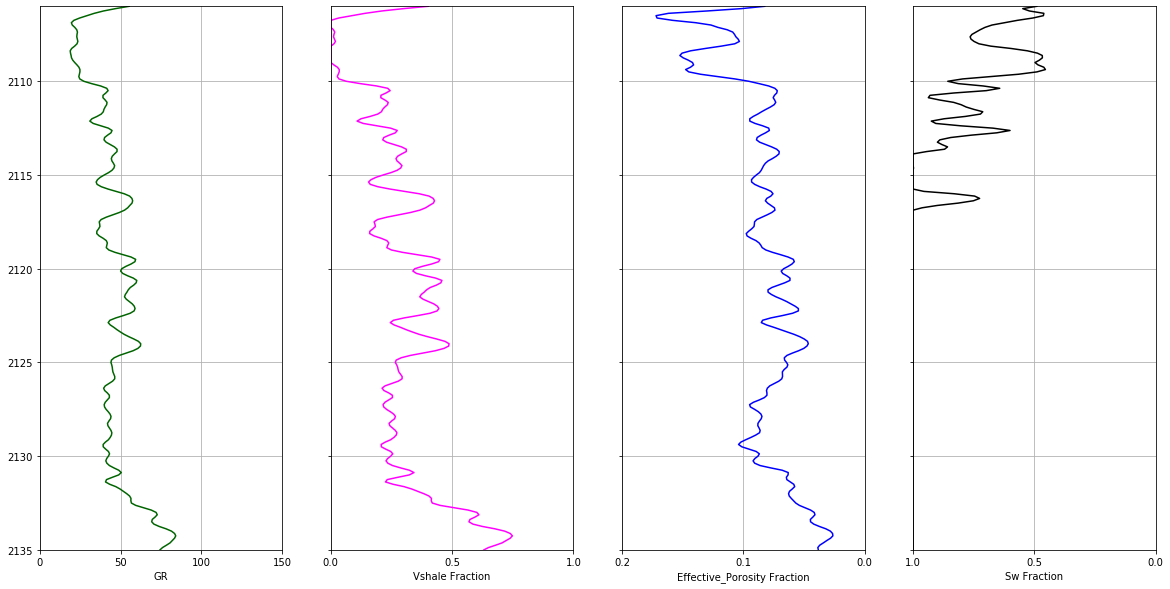

In [33]:
make_logs_plt_results(df)

In [34]:
df.describe()

,DEPTH,GR,Rt,RHOB,NPHI,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro,Ish,Sw
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,2120.500000,45.496451,43.136386,2529.588644,0.109323,0.105553,0.284176,0.111607,0.080919,166.141489,107.858198,166.141489,1.039623,0.912823
std,8.425686,13.567448,31.652849,72.200716,0.025275,0.042091,0.161464,0.017081,0.026719,149.093019,60.566116,149.093019,0.981090,0.156570
min,2106.000000,18.853000,9.993000,2329.195000,0.062640,0.000000,0.000000,0.078522,0.026126,28.380938,21.849132,28.380938,0.090512,0.454546
25%,2113.250000,39.525000,26.543000,2493.678000,0.091580,0.090654,0.211145,0.101090,0.064193,95.831461,66.174062,95.831461,0.492910,0.871898
50%,2120.500000,43.830000,32.325000,2515.775000,0.108530,0.113582,0.263012,0.109154,0.079622,122.472327,98.926202,122.472327,0.674079,1.000000
75%,2127.750000,53.512000,45.216000,2554.981000,0.120610,0.126504,0.379663,0.117249,0.090594,184.407170,137.382855,184.407170,1.297524,1.000000
max,2135.000000,84.120000,157.828000,2729.732000,0.212010,0.222693,0.748434,0.188290,0.171889,1017.600328,446.161352,1017.600328,4.473040,1.000000


In [36]:
df.to_csv("HW6.csv")